# **Importing the Libraries**

In [16]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


# **Loading the DataSets**

In [17]:
df_global_hunger_index = pd.read_csv("/content/GHI2022 scores.csv", encoding= 'unicode_escape')

df_child_undernourished = pd.read_csv("/content/Proportion of undernourished in the population.csv", encoding= 'unicode_escape')

df_child_wasting = pd.read_csv("/content/Prevalence of wasting in children under five years.csv", encoding= 'unicode_escape')

df_child_stunting = pd.read_csv("/content/Prevalence of stunting in children under five years.csv", encoding= 'unicode_escape')

df_child_mortality = pd.read_csv("/content/Under-five mortality rate.csv", encoding= 'unicode_escape')




# **Cleaning the DataSet**

In [18]:
df_global_hunger_index.drop("Absolute change since 2014", inplace=True, axis=1)

df_global_hunger_index.drop("% change since 2014", inplace=True, axis=1)

df_global_hunger_index


,Country,2000,2007,2014,2023
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1
134,Zambia,53.3,46.0,35.2,29.3


# **Handling Missing Data**

In [19]:
df_global_hunger_index.isnull().sum()

df_global_hunger_index.dropna()


,Country,2000,2007,2014,2023
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
130,Uzbekistan,24.2,15.4,8.3,5.6
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1


# **Analyzing , Modeling and Visualizing the Real World Questionnaire**

### Question_1 : The UN target is to achieve a GHI of 18.2 for all countries. How many countries are above the target in 2023?

In [20]:
Number_countries = df_global_hunger_index["Country"].unique().size
Number_countries


136

In [21]:
df_GHI=df_global_hunger_index

High_Countries = df_GHI.where (df_GHI["2023"] > 18.2)
High_Countries = High_Countries.dropna()


#High_Countries
High_Countries["2023"].count()

42

### Question_2 : For the UN to reach the target the mean of all country's GHI will be close to zero or zero. Predict when?


In [22]:
x= df_global_hunger_index.mean()
#x.array.reshape(1, -1)

y = [2000,2007,2014,2023]
y = pd.DataFrame (y)


# X.shape, y.shape
x= x.values.reshape(-1,1)

y = y.values

x,y


(array([[24.67606838],
        [20.40166667],
        [16.2768595 ],
        [15.22066116]]),
 array([[2000],
        [2007],
        [2014],
        [2023]]))

Text(0, 0.5, 'Year')

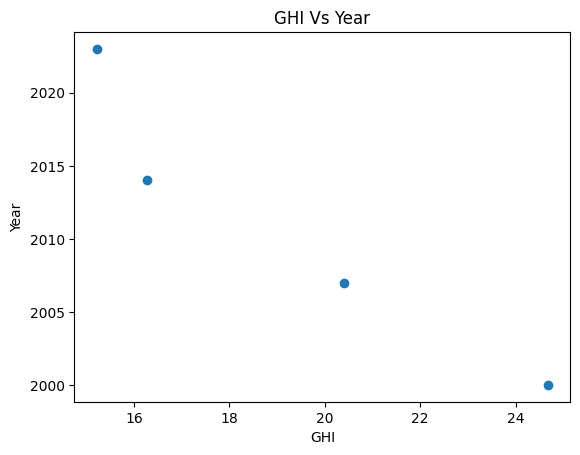

In [33]:
plt.scatter(x,y)
plt.title("GHI Vs Year")
plt.xlabel("GHI")
plt.ylabel("Year")


In [27]:
from sklearn.linear_model import LinearRegression


lr=LinearRegression()
model = lr.fit(x,y)
#model.intercept_ # y intercept, regression costant //array([2051.11144851])
#model.coef_ # slope, regression coeficient //array([[-2.1083285]])

#Model prediction
#y_pred = model.predict(x)
#y_pred

Prediction = model.predict([[0]])
Prediction



array([[2052.7074343]])

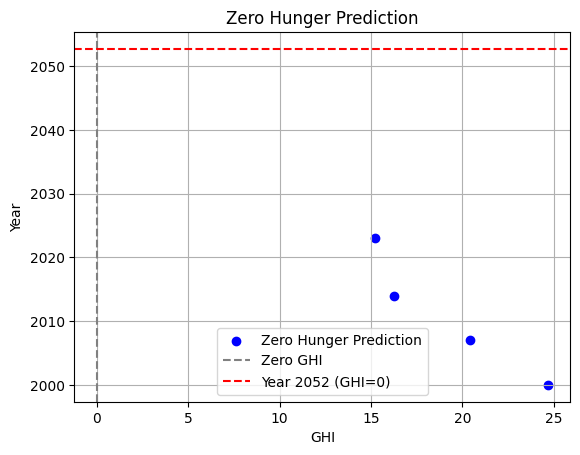

In [30]:

plt.scatter(x, y, label='Zero Hunger Prediction', color='blue')
plt.axvline(x=0, color='gray', linestyle='--', label='Zero GHI')
plt.axhline(y=Prediction[0], color='red', linestyle='--', label=f'Year {int(Prediction[0])} (GHI=0)')
plt.legend(loc='best')
plt.xlabel('GHI')
plt.ylabel('Year')
plt.title('Zero Hunger Prediction')
plt.grid(True)
plt.show()


In [25]:
model.score(x,y)

0.9132616734280751

### Question_3 : Let us see the impact of these 4 parameters (Child mortality, Under-nourishment, Child stunting and Child wasting) on the Global Hunger Index (GHI).

In [37]:
df_global_hunger_index.rename(columns={'2000':'GHI2000','2007': 'GHI2007', '2014':'GHI2014','2023':'GHI2023' }, inplace=True)
#df_global_hunger_index.head()

df_child_undernourished.rename(columns={'2000':'Nouri2000', '2007':'Nouri2007', '2014': 'Nouri2014','2023':'Nouri2023' }, inplace=True)
df_child_wasting.rename(columns={'2000':'wast2000','2007':'wast2007', '2014': 'wast2014','2023':'wast2023' }, inplace=True)
df_child_stunting.rename(columns={'2000':'stunt2000', '2007':'stunt2007', '2014': 'stunt2014','2023':'stunt2023' }, inplace=True)
df_child_mortality.rename(columns={'2000':'Morta2000', '2007':'Morta2007', '2014': 'Morta2014','2023':'Morta2023' }, inplace=True)

df = pd.concat([df_global_hunger_index, df_child_undernourished, df_child_wasting, df_child_stunting, df_child_mortality], axis=1)
df.head()



,Country,GHI2000,GHI2007,GHI2014,GHI2023,Country,Nouri2000,Nouri2007,Nouri2014,Nouri2023,...,Country,stunt2000,stunt2007,stunt2014,stunt2023,Country,Morta2000,Morta2007,Morta2014,Morta2023
0,Afghanistan,50.3,38.7,30.6,29.9,Afghanistan,47.8,29.8,20.7,29.8,...,Afghanistan,50.6,51.1,40.4,38.2,Afghanistan,12.9,10.0,7.4,5.8
1,Albania,20.7,15.8,9.2,6.2,Albania,4.9,8.3,5.0,3.9,...,Albania,39.2,25.0,15.2,11.3,Albania,2.7,1.7,1.0,1.0
2,Algeria,14.5,11.4,8.7,6.9,Algeria,8.0,5.9,2.9,2.0,...,Algeria,23.6,15.4,11.7,9.8,Algeria,4.0,3.1,2.5,2.3
3,Angola,64.9,44.7,26.2,25.9,Angola,67.5,46.1,13.7,20.8,...,Angola,46.7,29.2,37.6,29.8,Angola,20.4,14.7,9.3,7.1
4,Argentina,6.6,5.5,5.0,6.8,Argentina,3.0,3.3,2.0,3.7,...,Argentina,10.5,8.2,8.3,12.3,Argentina,2.0,1.6,1.2,0.9


In [38]:

df = df.fillna(df.mean())
#df.info()
#df.corr()


In [39]:
X = df[['Nouri2023', 'wast2023', 'stunt2023', 'Morta2023']]
y = df['GHI2023']

X = X.dropna()
#X

y = y.dropna()
#y

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedGHI = regr.predict([[2, 2, 2, 2]])
predictedGHI # 4.16

predictedGHI = regr.predict([[2, 0, 0, 0]])
predictedGHI #1.17


predictedGHI = regr.predict([[0, 2, 0, 0]])
predictedGHI # 1.49


predictedGHI = regr.predict([[0, 0, 2, 0]])
predictedGHI #0.51

predictedGHI = regr.predict([[0, 0, 0, 2]])
predictedGHI #1.47

# As you can see from the above predictions, Child Wasting has more weight than other parameters


array([1.47914488])